## 读取客户流失数据

In [29]:
import pandas
df = pandas.read_csv('../data/customer_churn.csv', index_col=0, header = 0)

## 数据前处理

In [30]:
df = df.iloc[:,3:]

In [31]:
cat_var = ['international_plan','voice_mail_plan', 'churn']

for var in cat_var:
    df[var] = df[var].map(lambda e: 1 if e == 'yes' else 0)

In [32]:
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

## 区分训练与测试数据集

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

## 尺度标准化

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## 建立ANN

In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [37]:
classifier = Sequential()
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 16))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = classifier.fit(x_train, y_train,
                    batch_size=10,
                    epochs=100,
                    validation_data=(x_test, y_test))

Train on 2233 samples, validate on 1100 samples
Epoch 1/100
2233/2233 [==============================] - 1s 284us/step - loss: 0.5729 - acc: 0.8495 - val_loss: 0.3647 - val_acc: 0.8636
Epoch 2/100
2233/2233 [==============================] - 0s 165us/step - loss: 0.3544 - acc: 0.8509 - val_loss: 0.3154 - val_acc: 0.8636
Epoch 3/100
2233/2233 [==============================] - 0s 167us/step - loss: 0.3392 - acc: 0.8509 - val_loss: 0.3077 - val_acc: 0.8636
Epoch 4/100
2233/2233 [==============================] - 0s 160us/step - loss: 0.3330 - acc: 0.8509 - val_loss: 0.3051 - val_acc: 0.8636
Epoch 5/100
2233/2233 [==============================] - 0s 160us/step - loss: 0.3301 - acc: 0.8509 - val_loss: 0.3006 - val_acc: 0.8636
Epoch 6/100
2233/2233 [==============================] - 0s 162us/step - loss: 0.3286 - acc: 0.8509 - val_loss: 0.2983 - val_acc: 0.8636
Epoch 7/100
2233/2233 [==============================] - 0s 169us/step - loss: 0.3268 - acc: 0.8562 - val_loss: 0.2976 - val_acc: 

2233/2233 [==============================] - 0s 183us/step - loss: 0.2013 - acc: 0.9373 - val_loss: 0.2055 - val_acc: 0.9227
Epoch 61/100
2233/2233 [==============================] - 0s 181us/step - loss: 0.2000 - acc: 0.9382 - val_loss: 0.2069 - val_acc: 0.9300
Epoch 62/100
2233/2233 [==============================] - 0s 190us/step - loss: 0.1988 - acc: 0.9378 - val_loss: 0.2109 - val_acc: 0.9282
Epoch 63/100
2233/2233 [==============================] - 0s 184us/step - loss: 0.1993 - acc: 0.9395 - val_loss: 0.2064 - val_acc: 0.9236
Epoch 64/100
2233/2233 [==============================] - 0s 211us/step - loss: 0.1980 - acc: 0.9400 - val_loss: 0.2053 - val_acc: 0.9264
Epoch 65/100
2233/2233 [==============================] - 0s 179us/step - loss: 0.1976 - acc: 0.9351 - val_loss: 0.2053 - val_acc: 0.9300
Epoch 66/100
2233/2233 [==============================] - 0s 180us/step - loss: 0.1968 - acc: 0.9378 - val_loss: 0.2036 - val_acc: 0.9291
Epoch 67/100
2233/2233 [=======================

## 評估ANN

In [38]:
y_pred = classifier.predict(x_test)

In [39]:
y_pred

array([[0.6983981 ],
       [0.03432922],
       [0.02992912],
       ...,
       [0.02928437],
       [0.00207323],
       [0.04132622]], dtype=float32)

In [40]:
predicted = (y_pred > 0.5).flatten().astype(int)

In [41]:
predicted

array([1, 0, 0, ..., 0, 0, 0])

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[923,  27],
       [ 52,  98]])

In [43]:
from sklearn.metrics import roc_curve
fpr_ary, tpr_ary, thresholds = roc_curve(y_test, y_pred)

Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['var']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


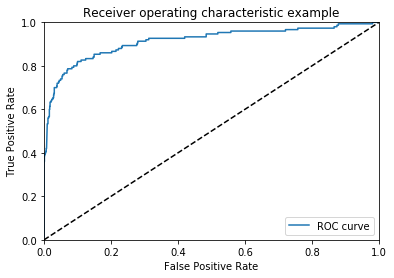

In [44]:
%pylab inline
import matplotlib.pyplot as plt
plt.plot(fpr_ary, tpr_ary, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [46]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9205543859649123

## 使用ROC Curve比较模型

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(x_train, y_train)

clf2 = SVC(probability = True)
clf2.fit(x_train, y_train)

clf3 = LogisticRegression()
clf3.fit(x_train, y_train)

clf4 = RandomForestClassifier()
clf4.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

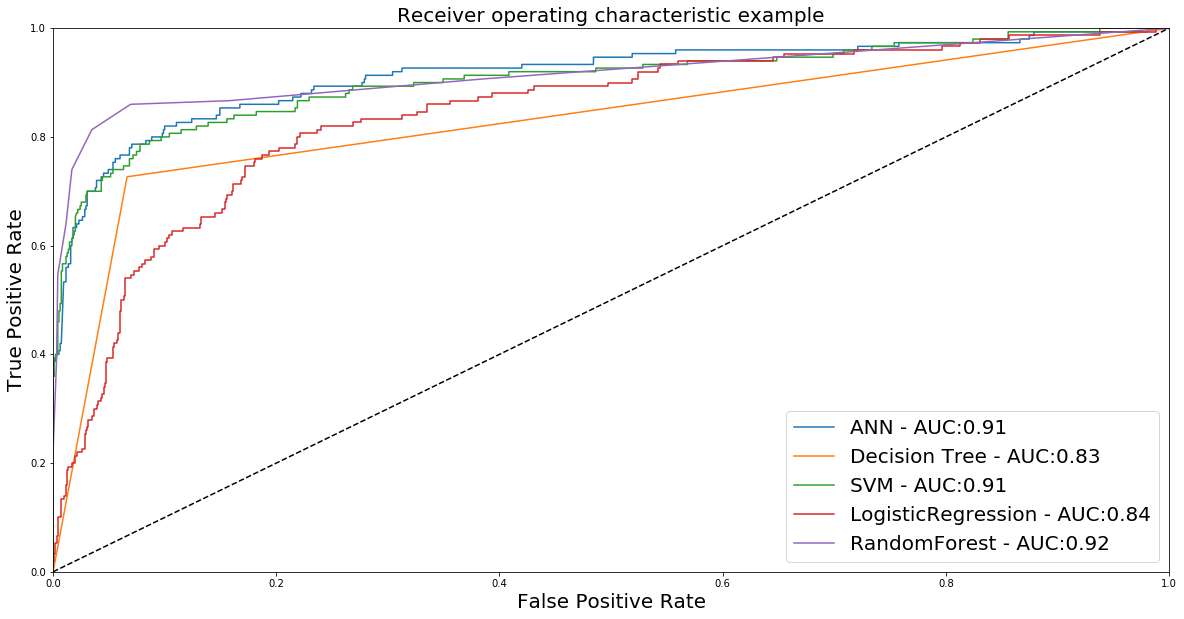

In [47]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize= [20,10])
for clf, title in zip([classifier,clf1,clf2,clf3, clf4], ['ANN','Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest']):
    if title != 'ANN':
        probas_ = clf.fit(x_train, y_train).predict_proba(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    else:
        y_pred = clf.predict(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()